In [36]:
from openparse import DocumentParser, Pdf
from pprint import pprint
import re
import os

ELEMENT_DELIMETER = "<br><br>"
NEWLINE = "  \n"
DOUBLE_NEWLINE = "\n\n"

pdf_path = "../samples/abc.pdf"

parser = DocumentParser(
    table_args={
        "parsing_algorithm": "pymupdf",
        "table_output_format": "markdown",
    },
)

parsed_pdf = parser.parse(pdf_path)
pdf_dict = parsed_pdf.model_dump()
pprint(pdf_dict)

{'coordinate_system': 'bottom-left',
 'creation_date': datetime.date(2024, 5, 22),
 'file_size': 2174743,
 'filename': 'abc.pdf',
 'last_accessed_date': datetime.date(2024, 5, 22),
 'last_modified_date': datetime.date(2024, 5, 22),
 'nodes': [{'bbox': [{'page': 2,
                      'page_height': 841.9,
                      'page_width': 595.3,
                      'x0': 85.08,
                      'x1': 505.2,
                      'y0': 574.99,
                      'y1': 743.64}],
            'embedding': None,
            'node_id': '01d3f23b-6549-4a66-b4b3-662eec184979',
            'text': '独创性声明\n'
                    '本人声明所呈交的学位论文是我个人在导师的指导下进行的研究<br><br>工作及取得的研究成果。尽我所知，除文中已标明引用的内容外，本<br><br>论文不包含任何其他人或集体已经发表或撰写过的研究成果。对本文<br><br>的研究做出贡献的个人和集体，均已在文中以明确方式标明。本人完<br><br>全意识到本声明的法律结果由本人承担。',
            'tokens': 162,
            'variant': {'text'}},
           {'bbox': [{'page': 2,
                      'page_height': 841.9,
                      'page_width': 595.3,
       

In [37]:
def remove_spaces_and_newlines(text: str) -> str:
    # 使用正则表达式去掉汉字与汉字之间的空格和换行符
    text = re.sub(r"(?<=[\u4e00-\u9fff])\s+(?=[\u4e00-\u9fff])", "", text)
    # 使用正则表达式去掉英文与英文之间的空格和换行符
    text = re.sub(r"(?<=[a-zA-Z])\s+(?=[a-zA-Z])", "", text)
    # 使用正则表达式去掉汉字与英文之间的空格和换行符
    text = re.sub(r"(?<=[\u4e00-\u9fff])\s+(?=[a-zA-Z])", "", text)
    # 使用正则表达式去掉英文与汉字之间的空格和换行符
    text = re.sub(r"(?<=[a-zA-Z])\s+(?=[\u4e00-\u9fff])", "", text)
    return text

In [38]:
def write_text_to_markdown(data, output_file):
    formatted_text = ""
    for item in data:
        text = item["text"]

        text = text.replace(ELEMENT_DELIMETER, NEWLINE)
        if "table" in item["variant"]:
            text = remove_spaces_and_newlines(text)

        if formatted_text == "":
            formatted_text = text
        else:
            formatted_text = formatted_text + DOUBLE_NEWLINE + text
    with open(output_file, "w", encoding="utf-8") as f:
        f.write(formatted_text)


output_file = "output_markdown/document.md"
os.makedirs(os.path.dirname(output_file), exist_ok=True)
write_text_to_markdown(pdf_dict["nodes"], output_file)

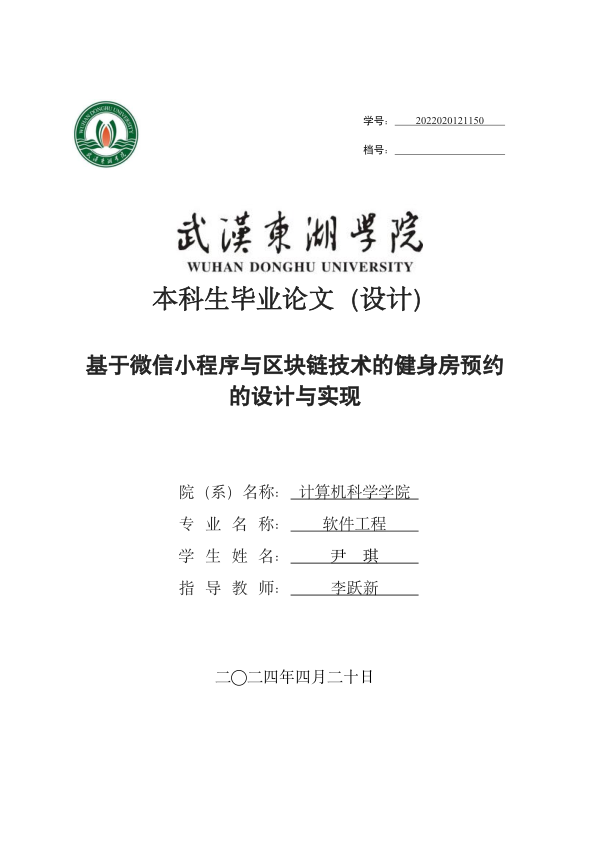

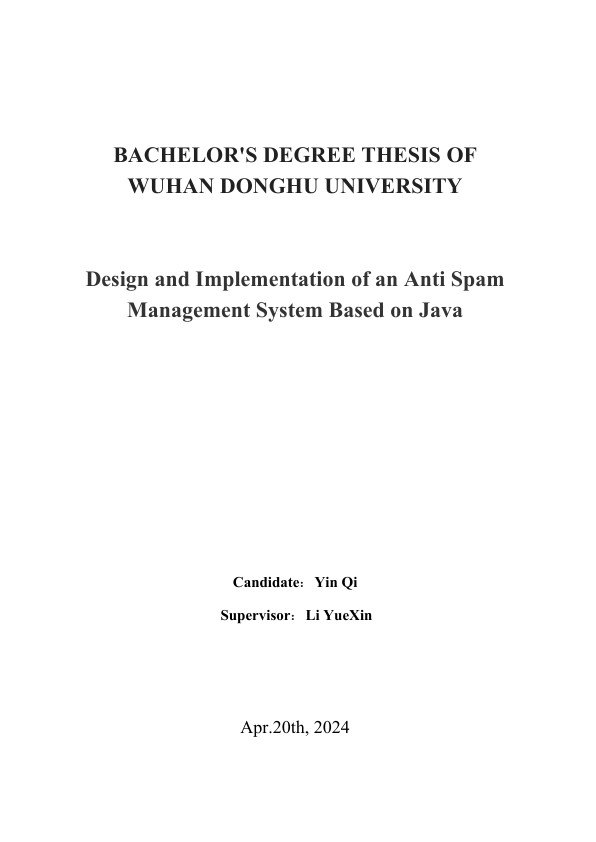

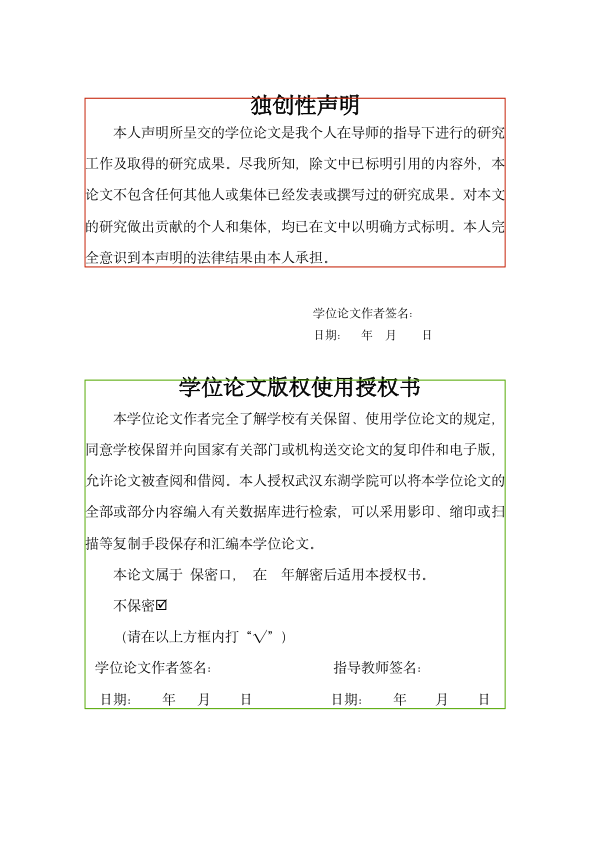

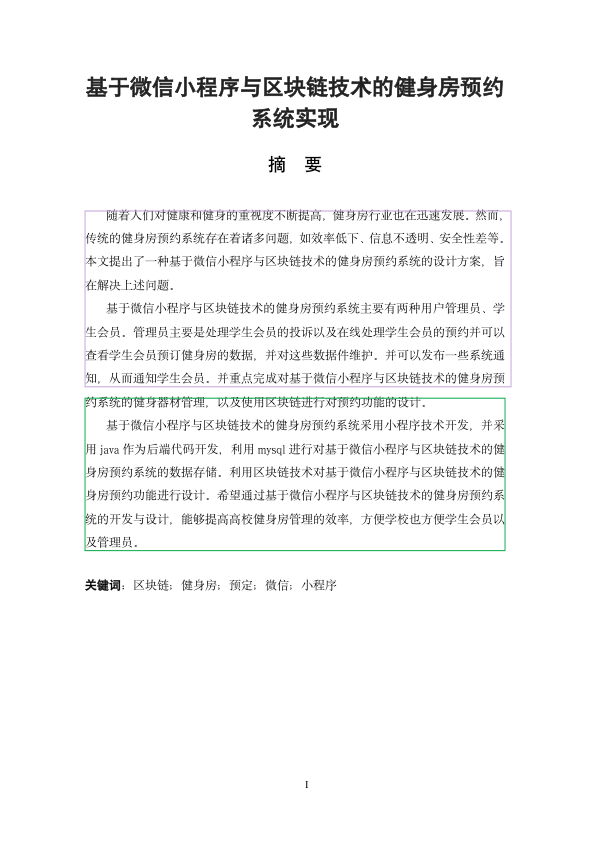

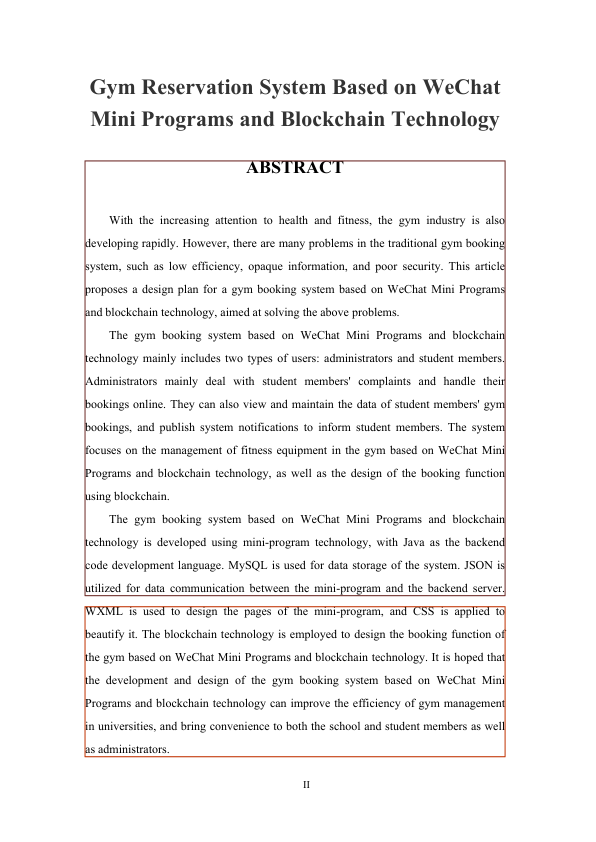

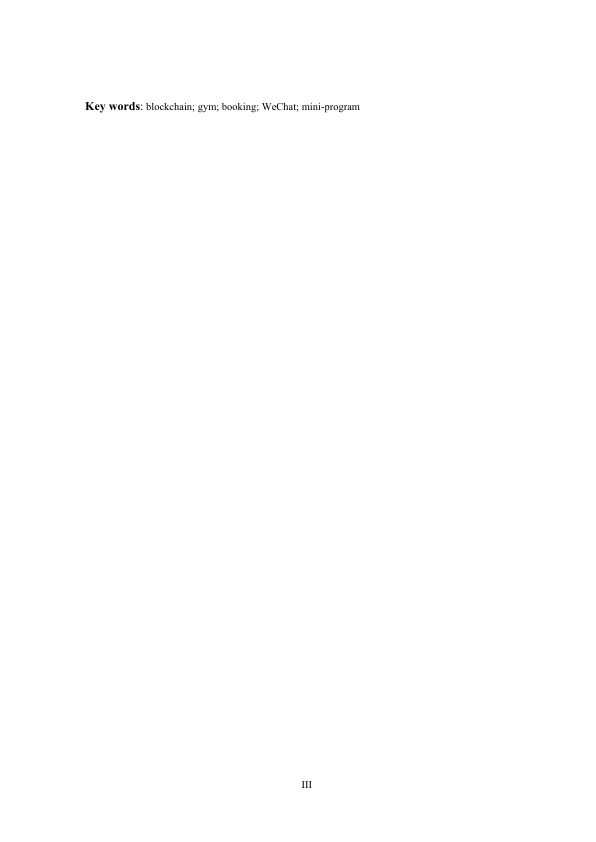

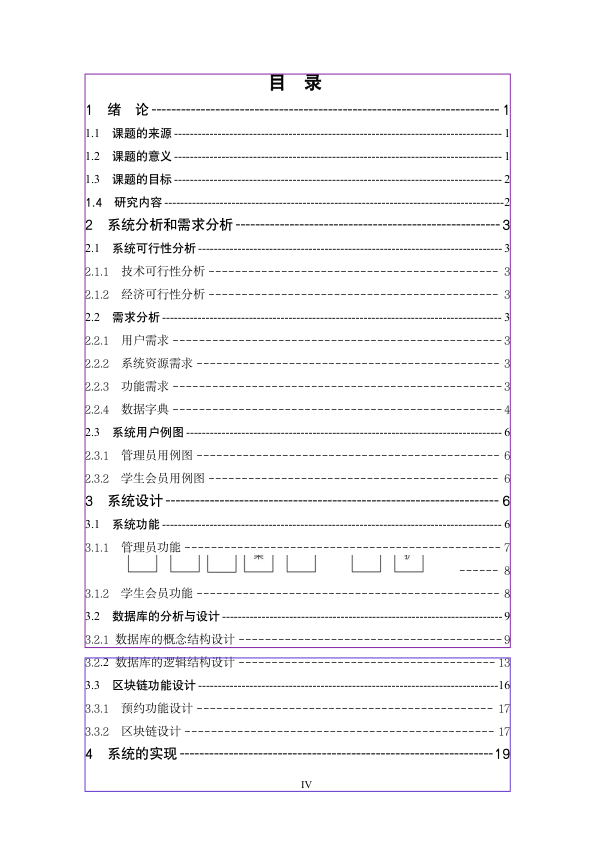

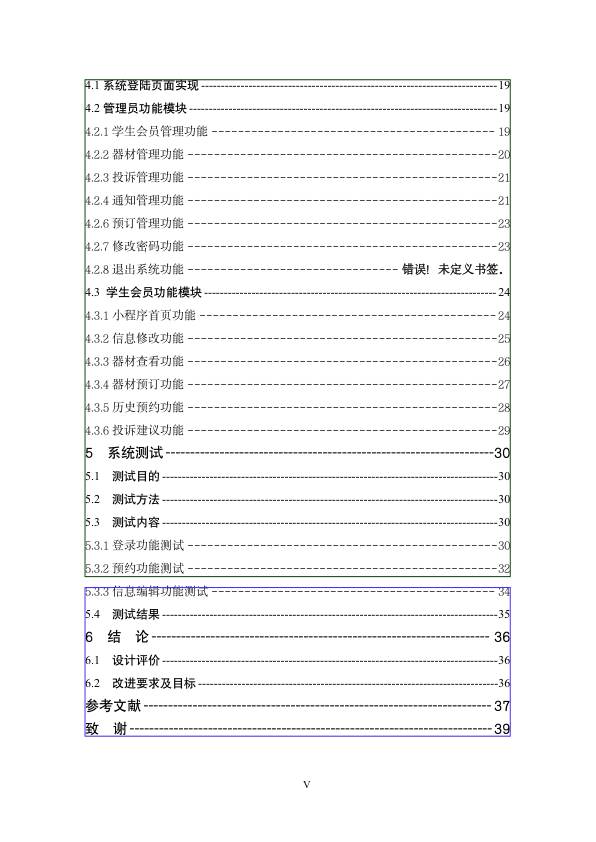

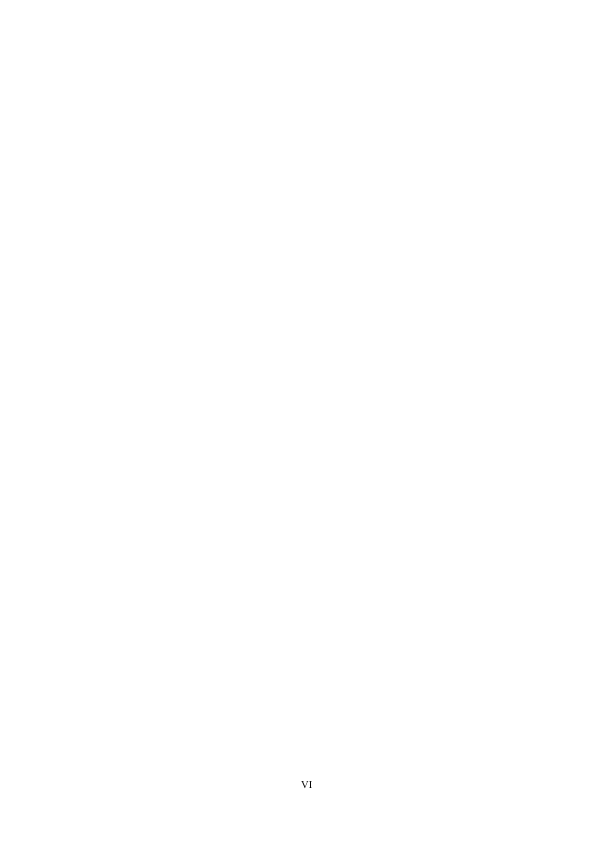

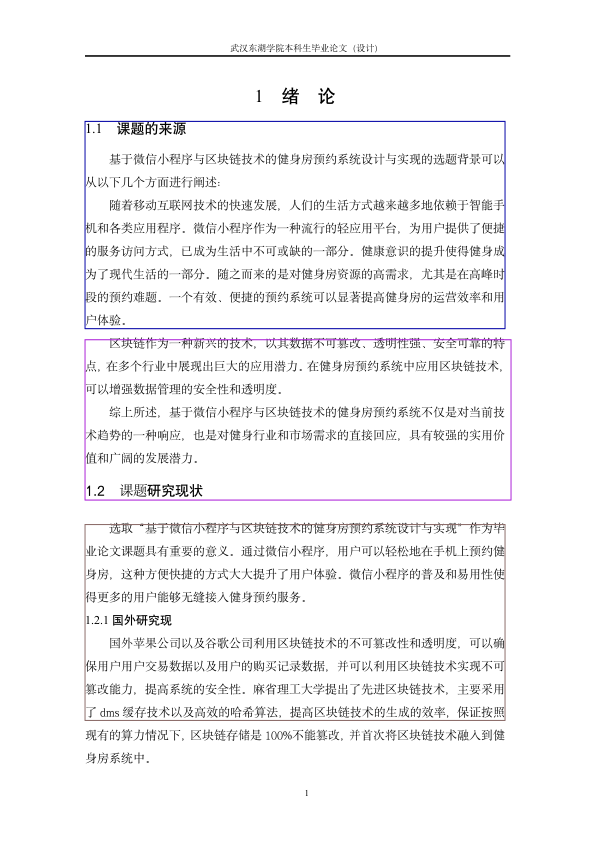

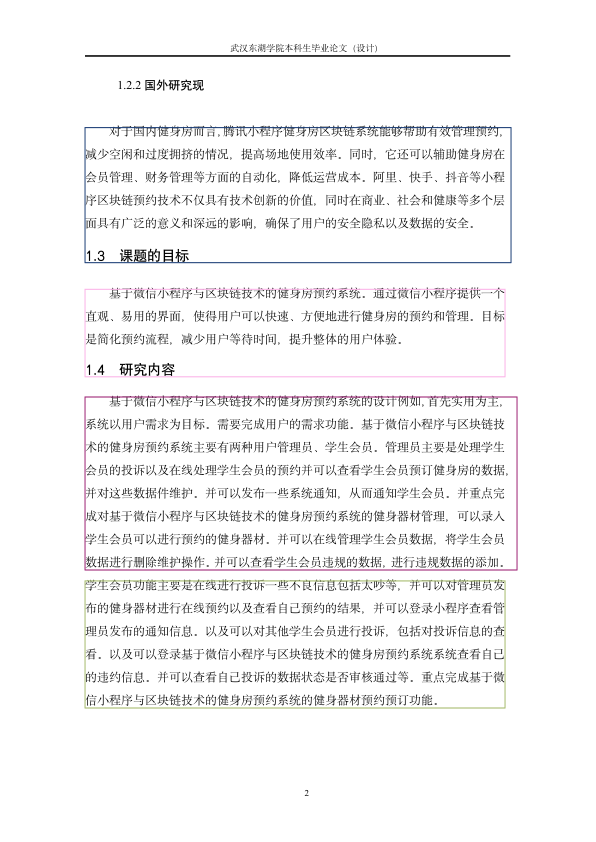

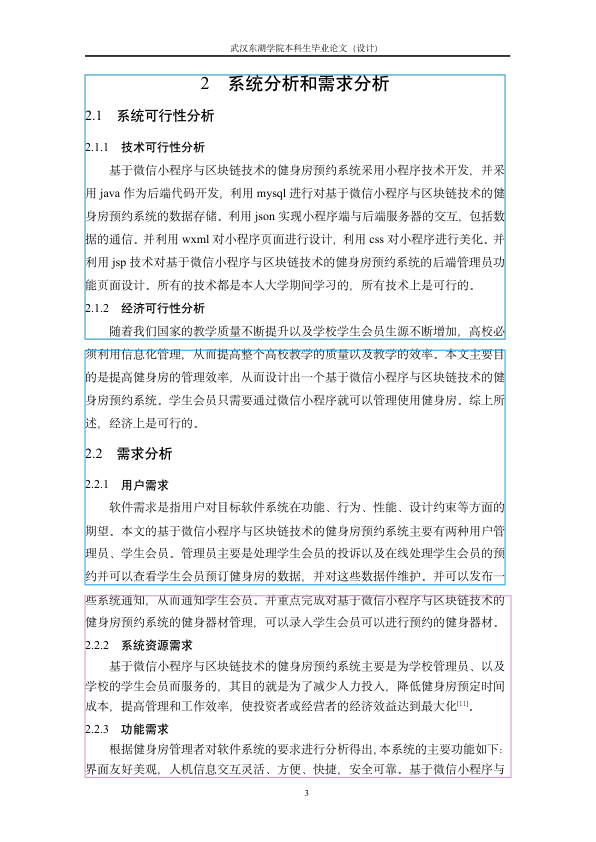

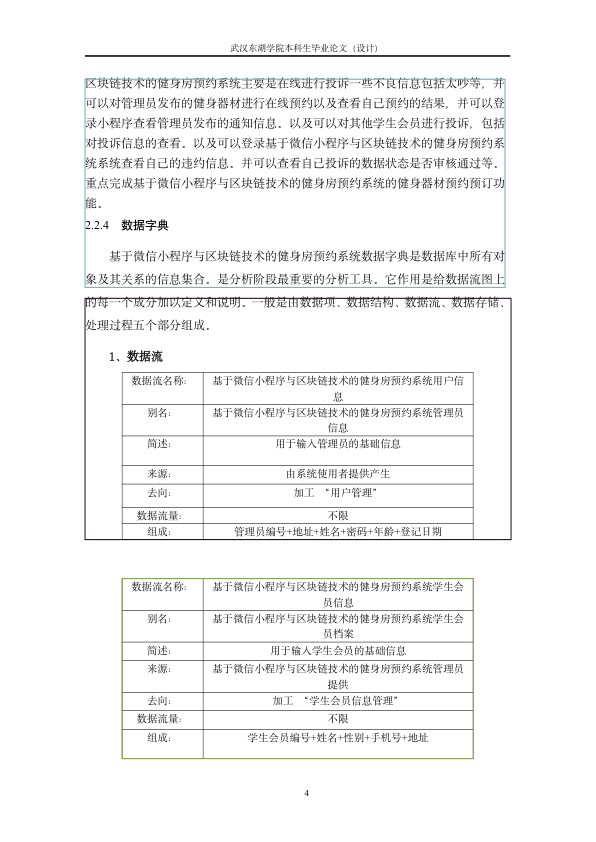

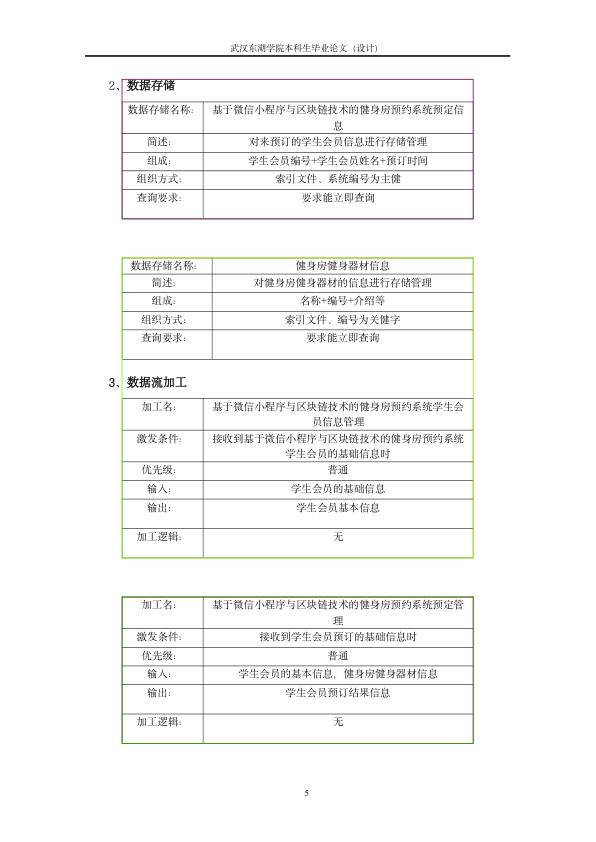

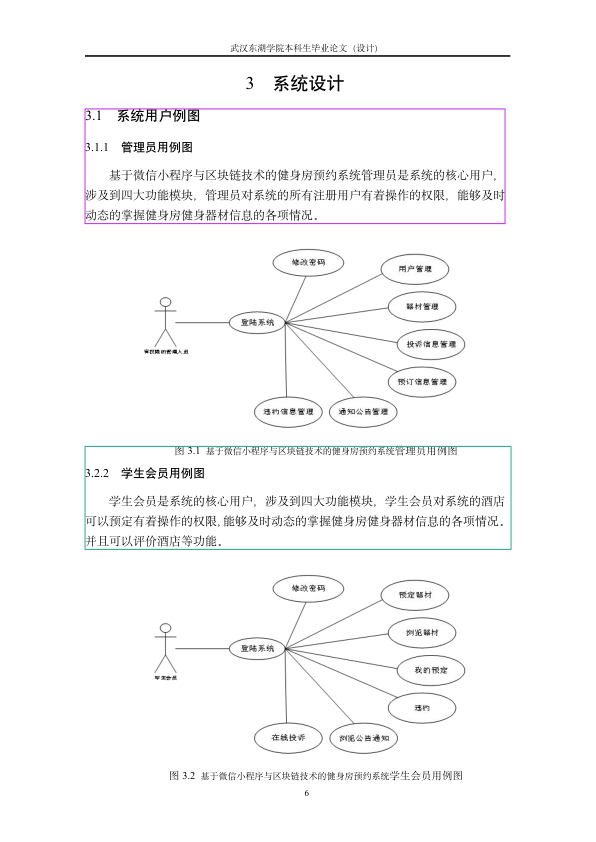

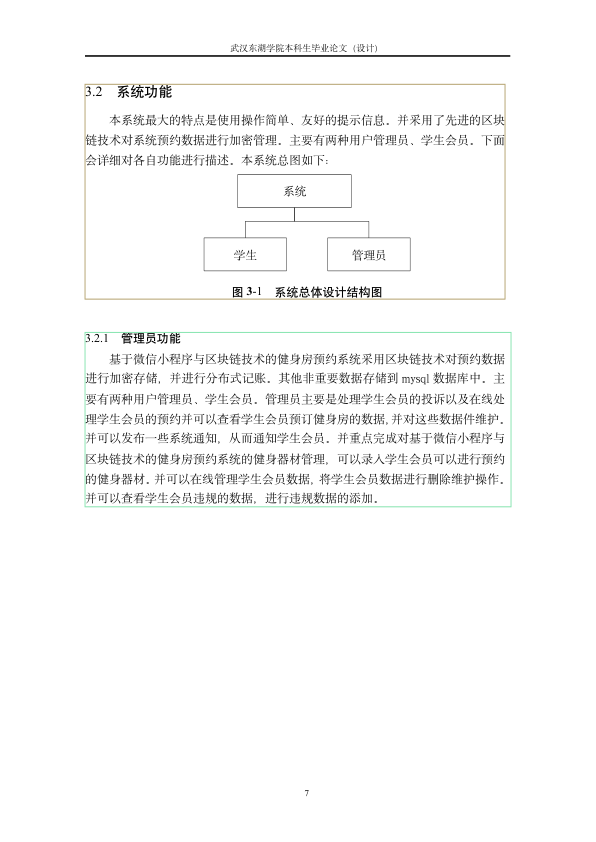

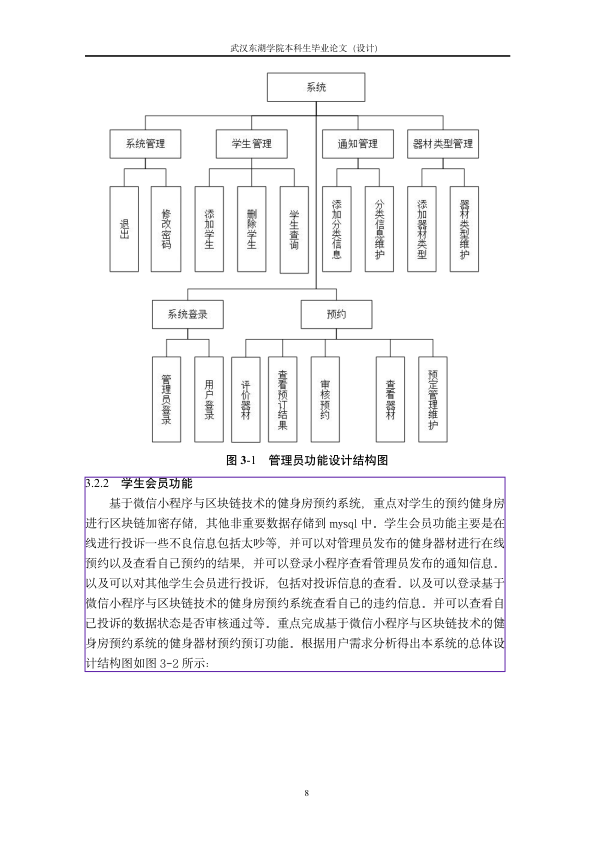

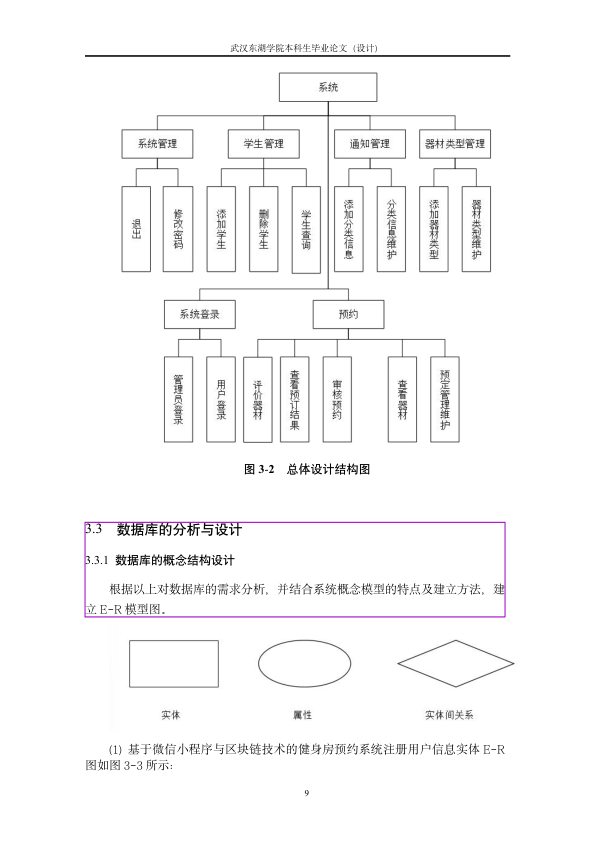

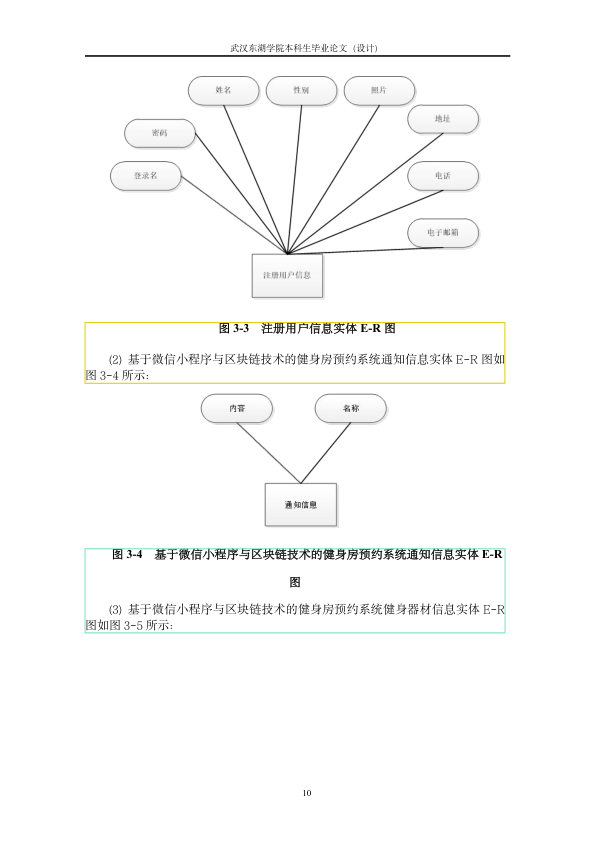

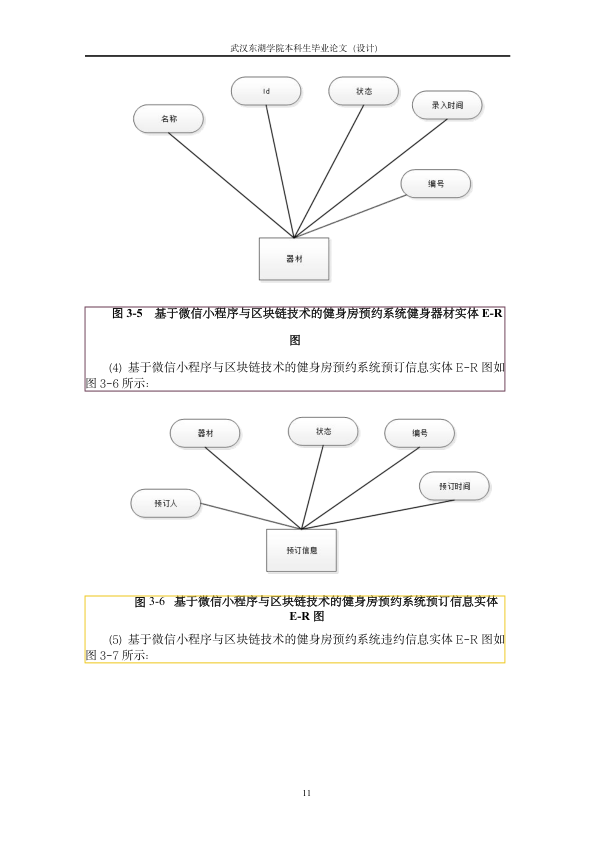

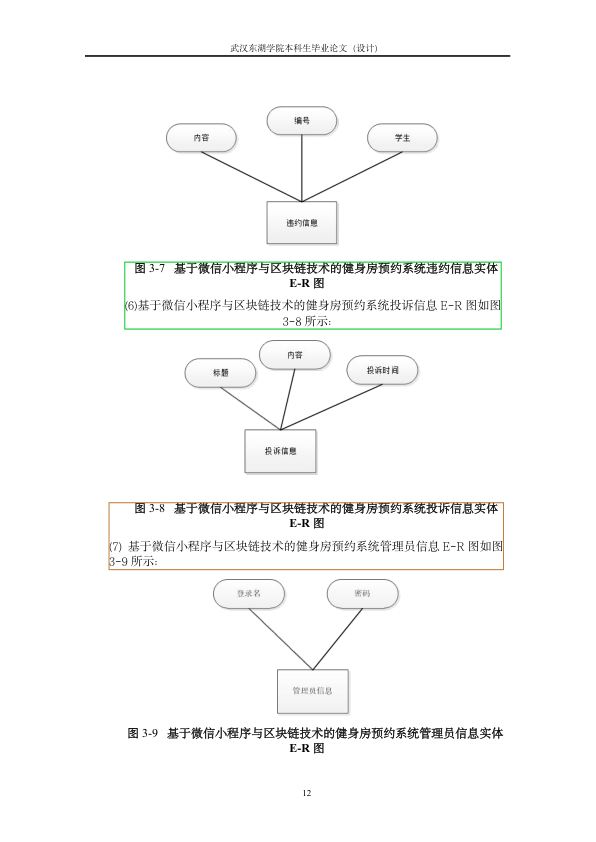

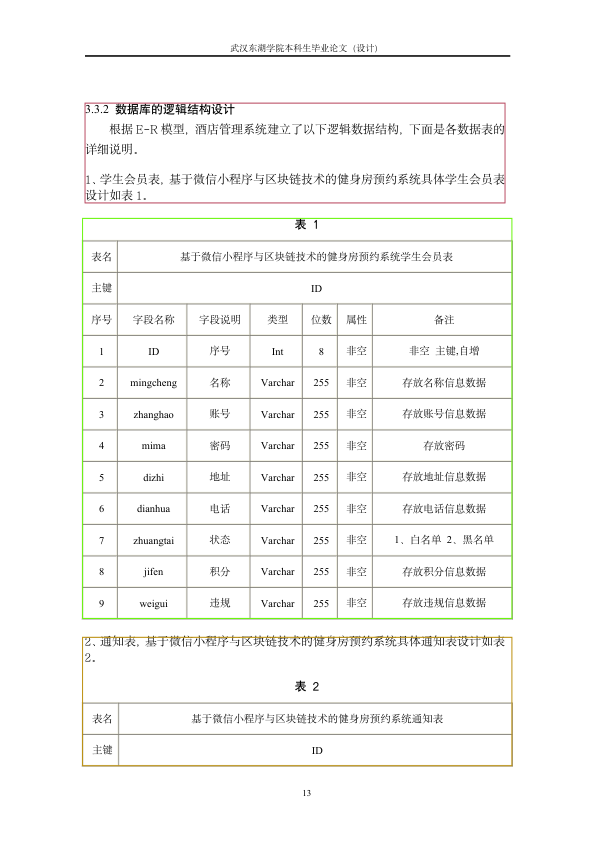

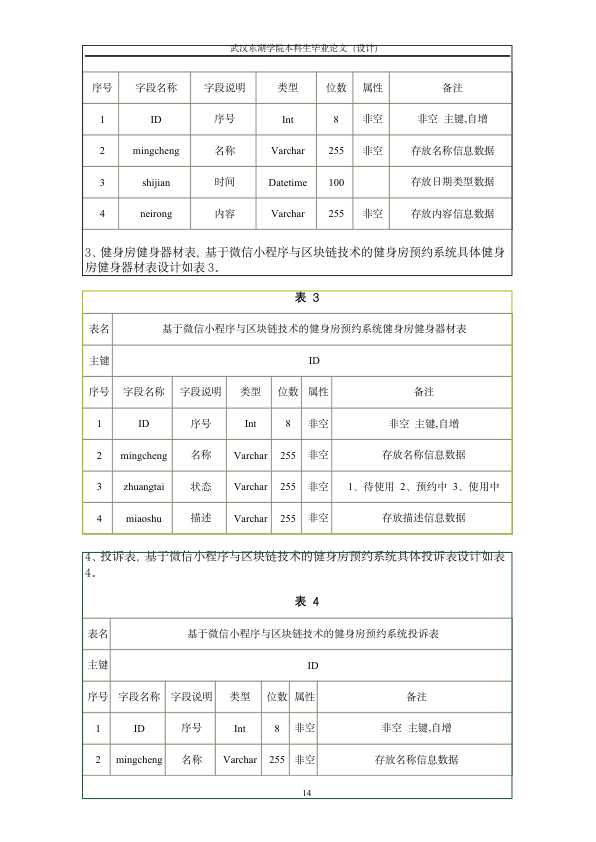

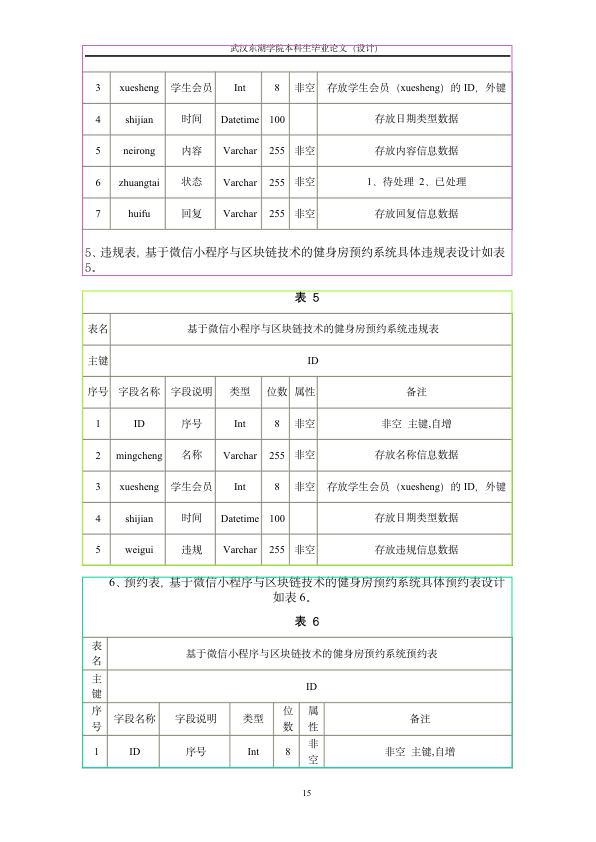

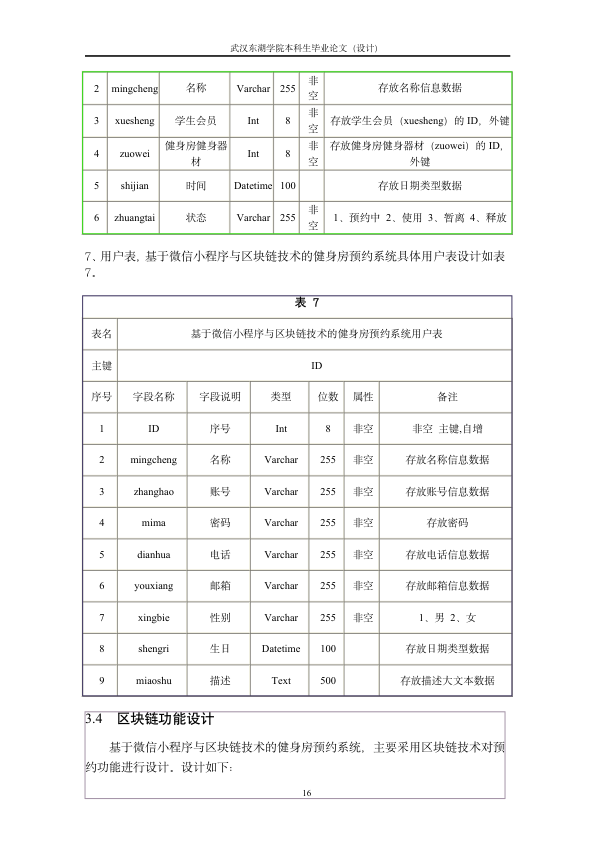

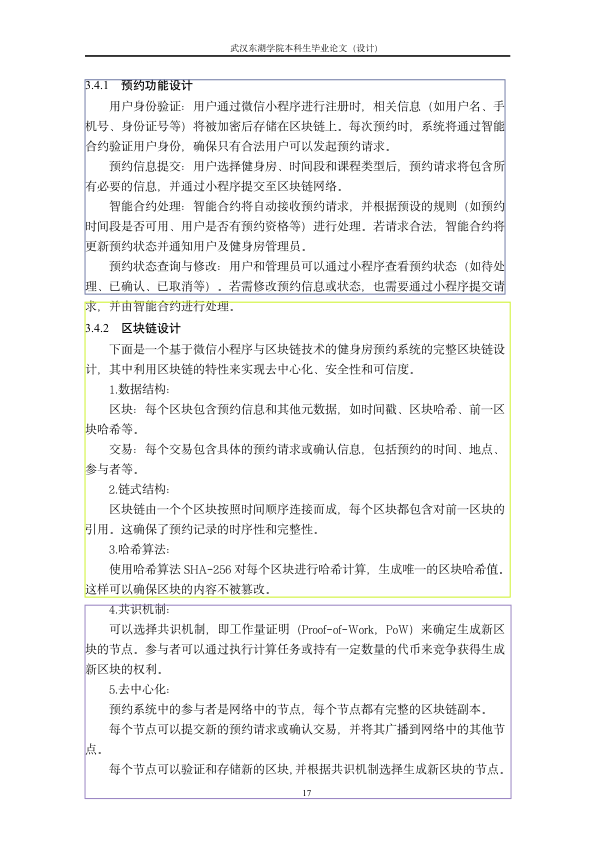

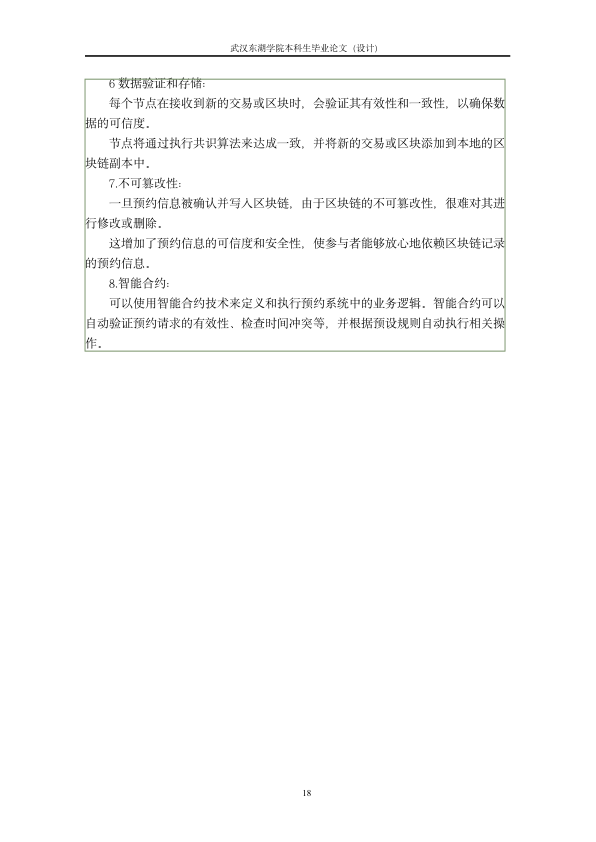

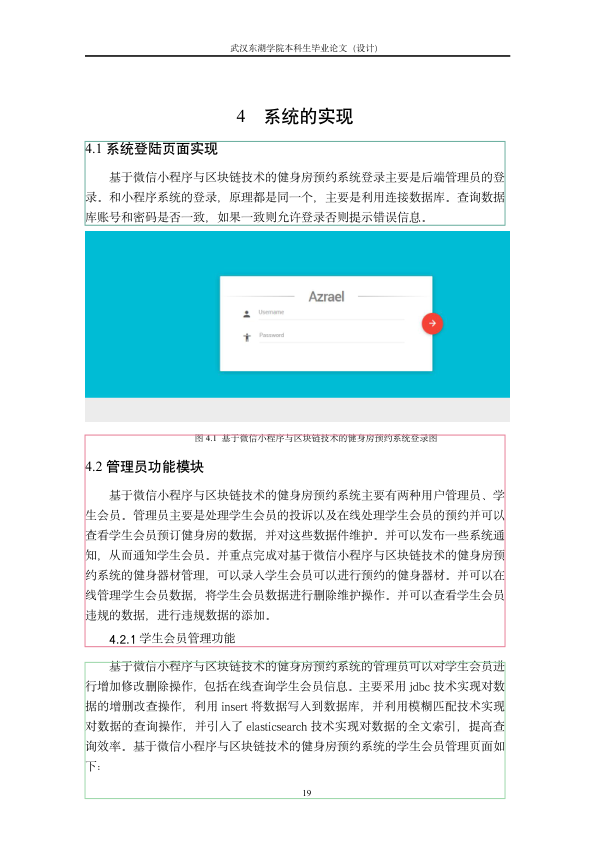

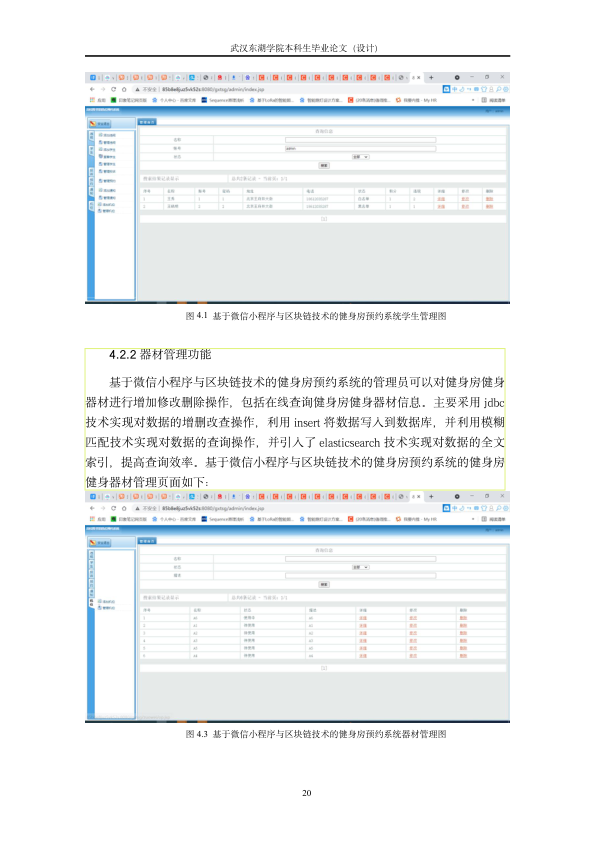

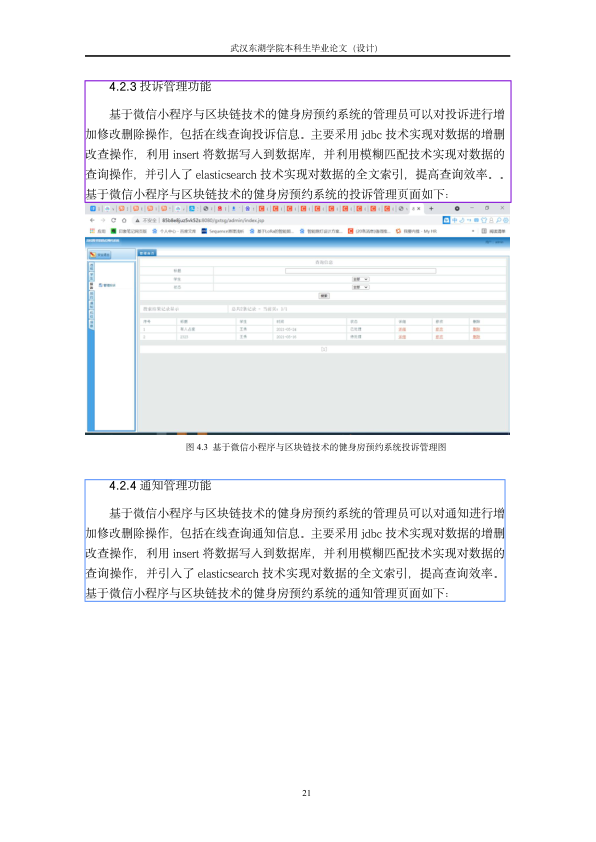

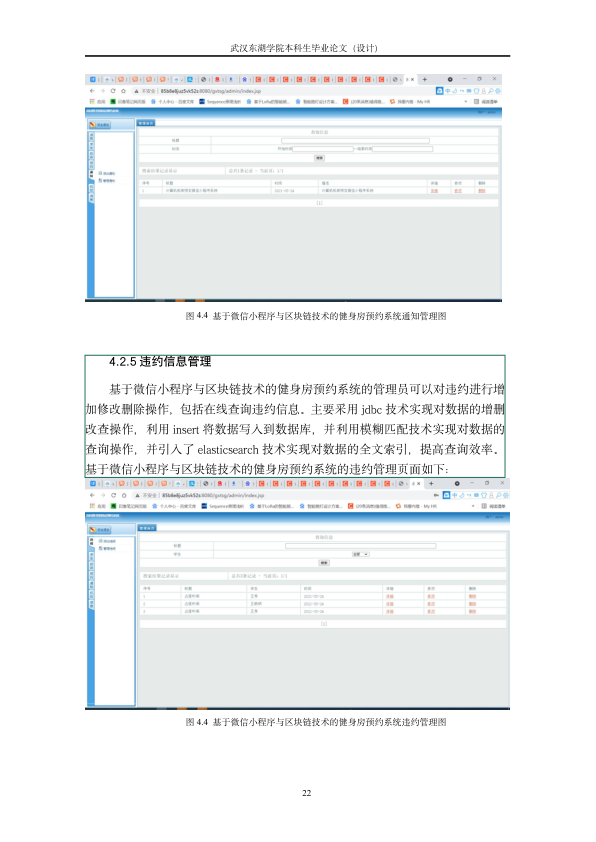

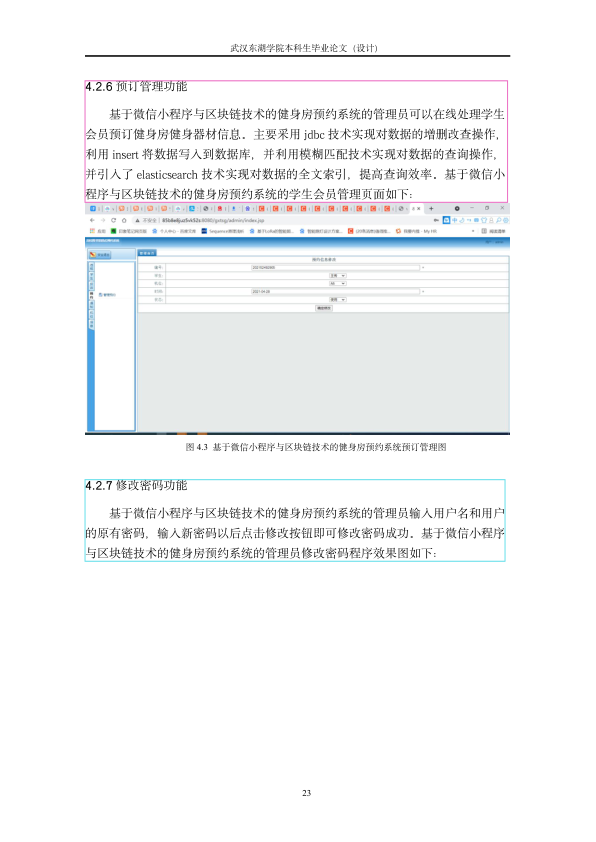

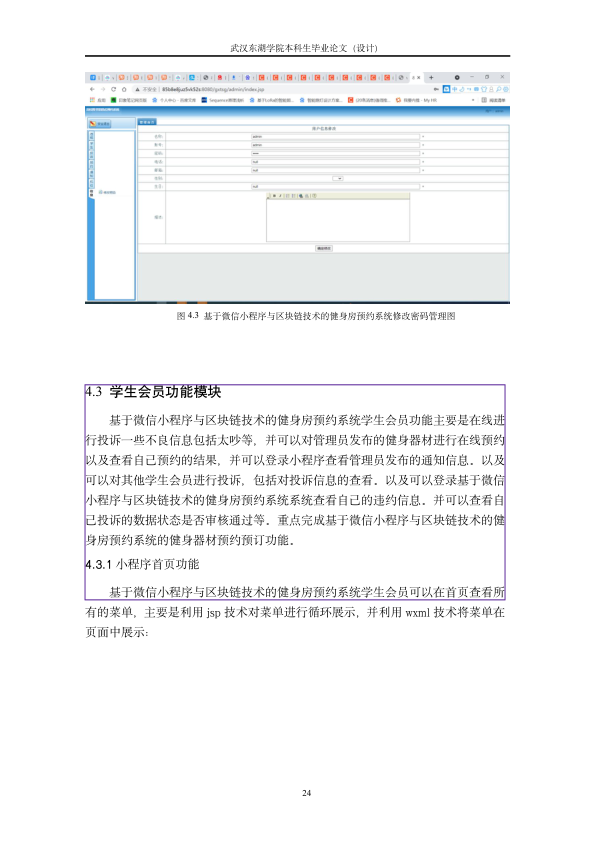

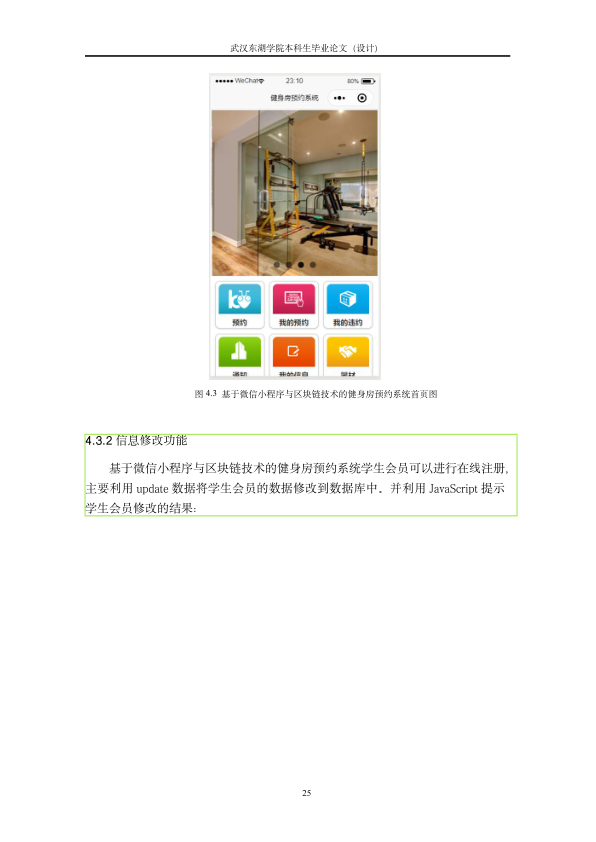

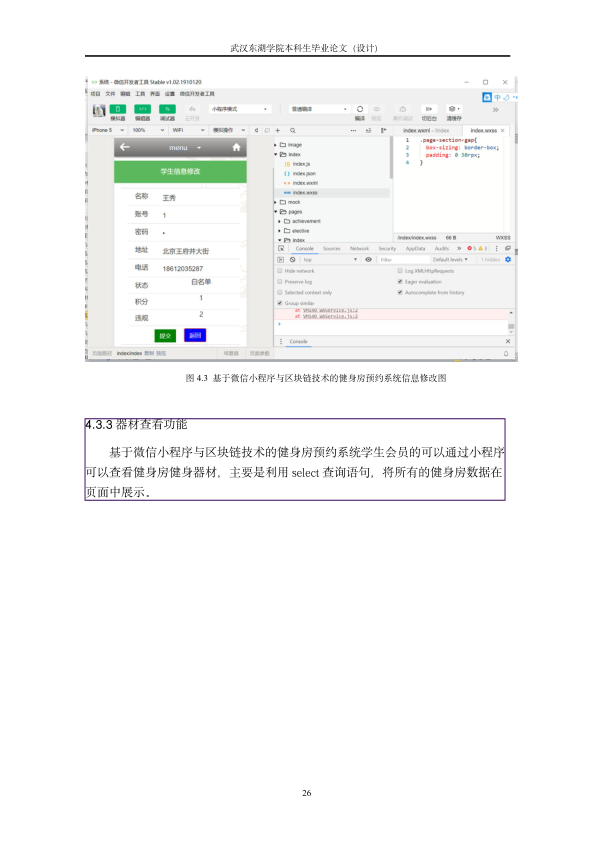

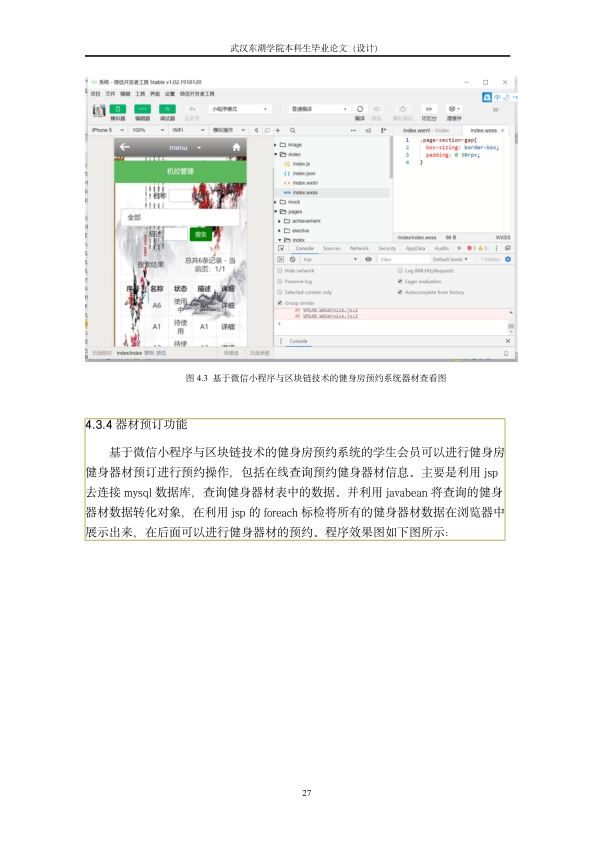

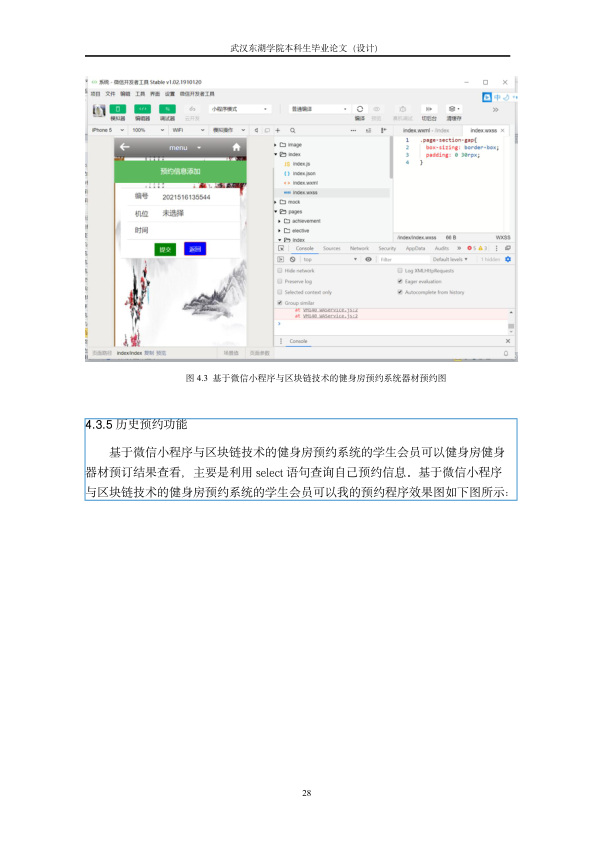

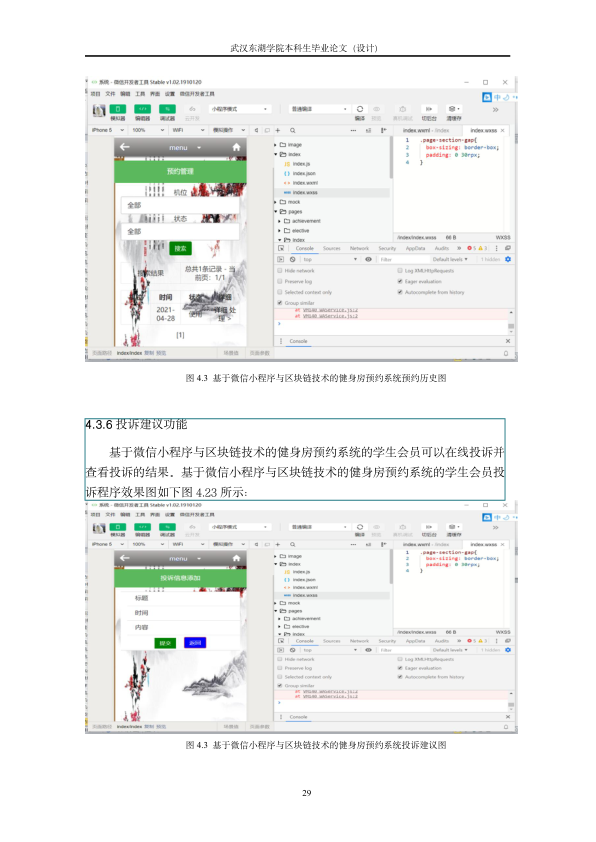

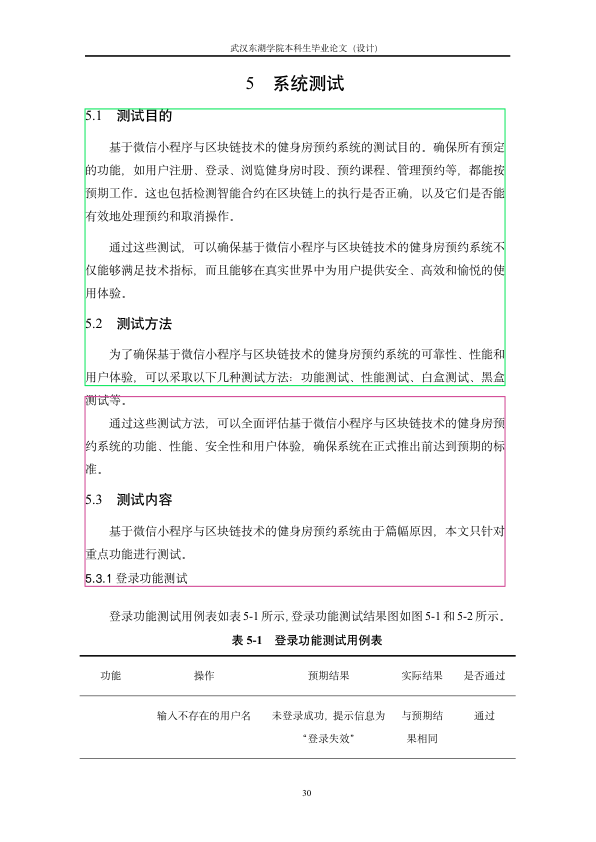

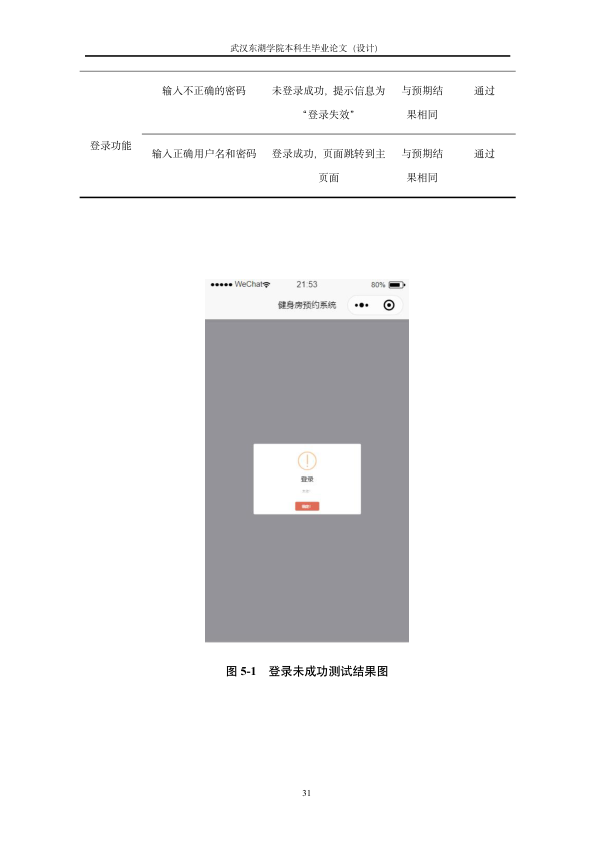

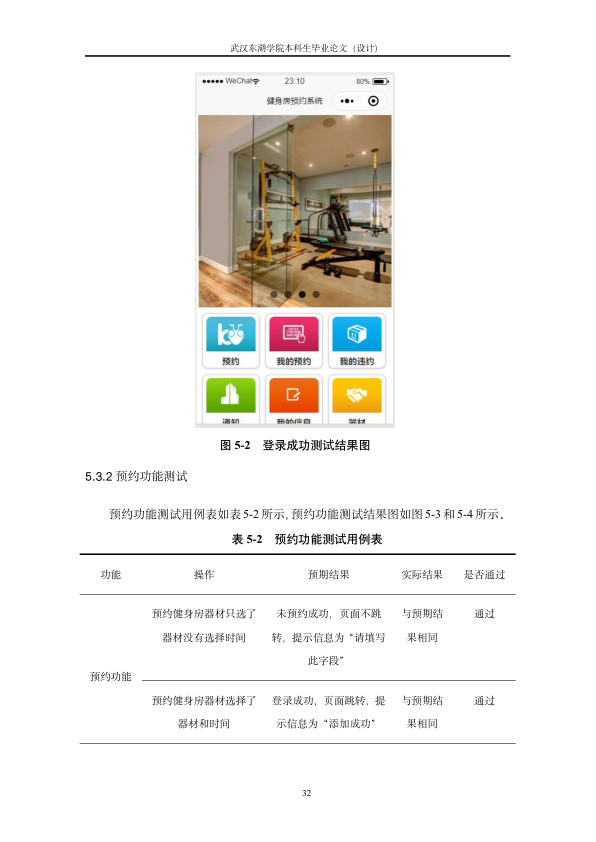

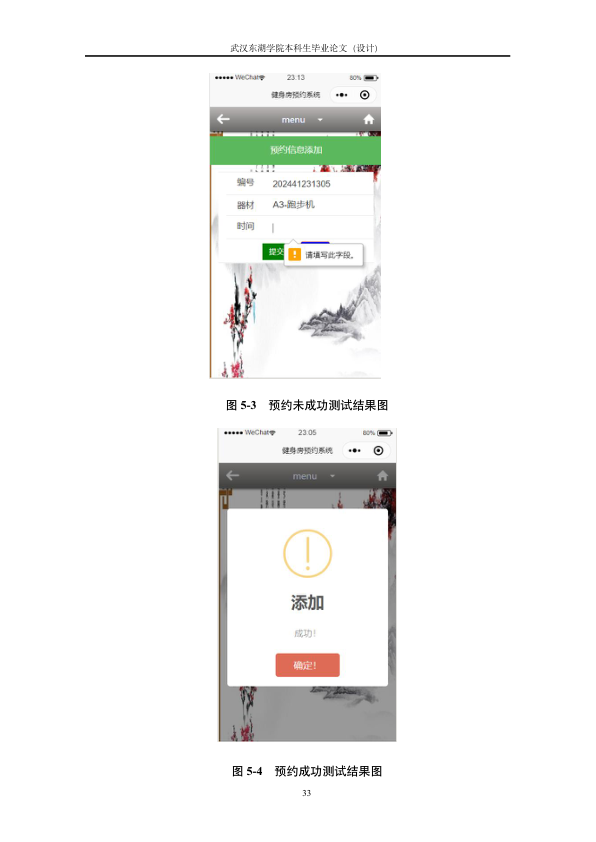

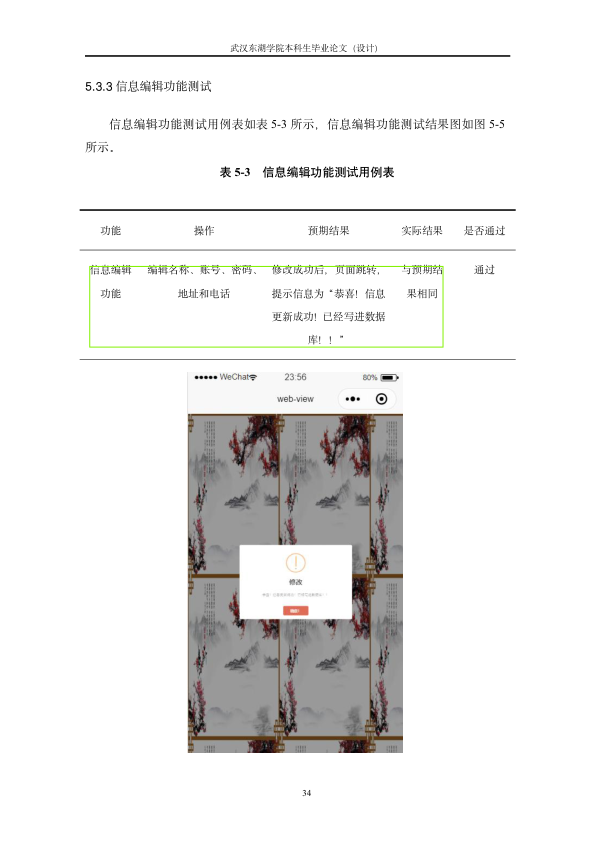

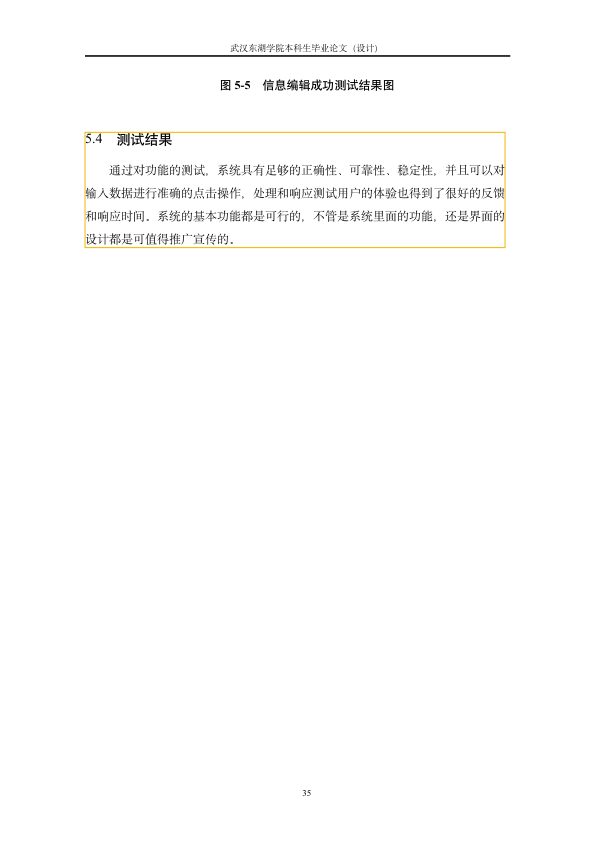

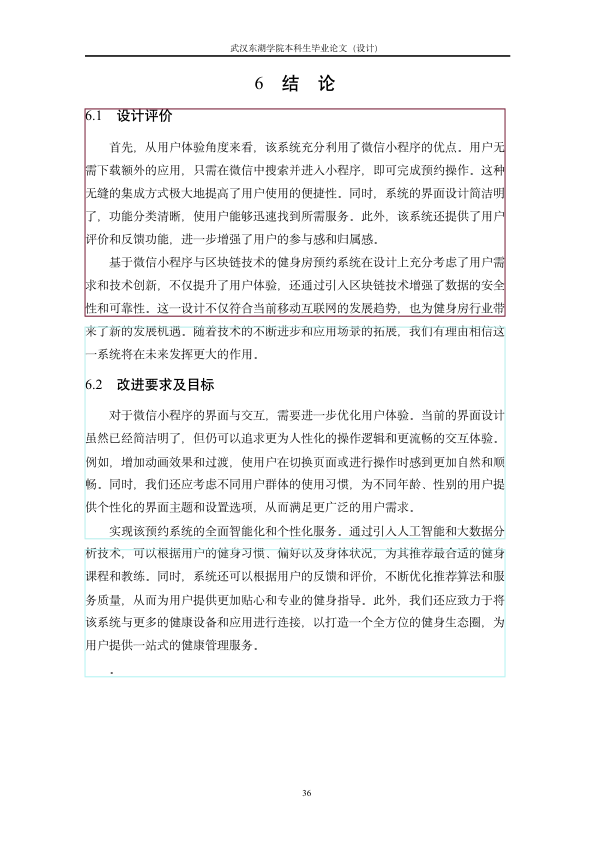

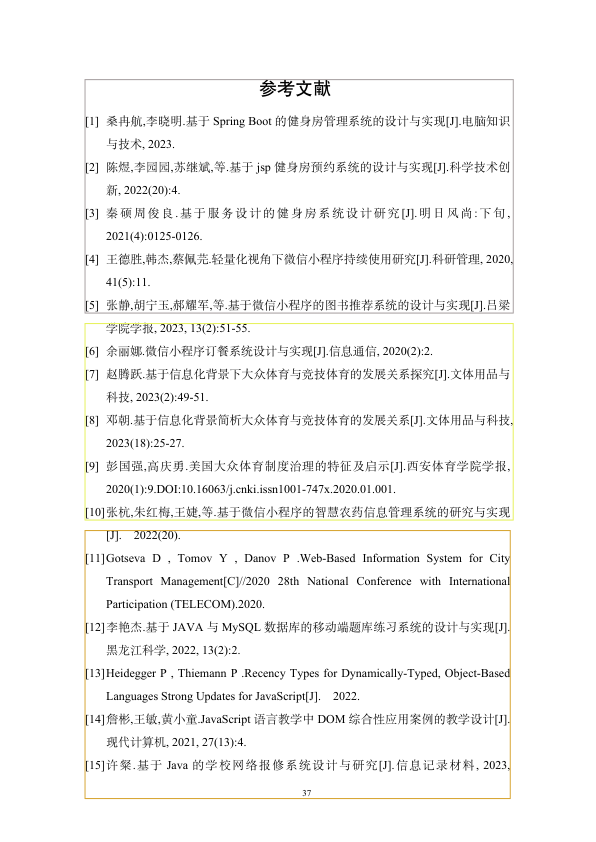

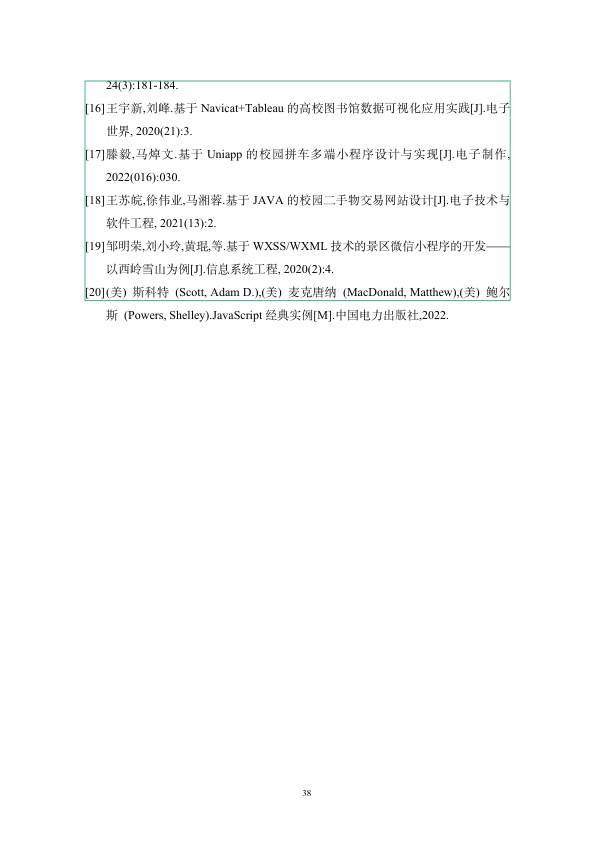

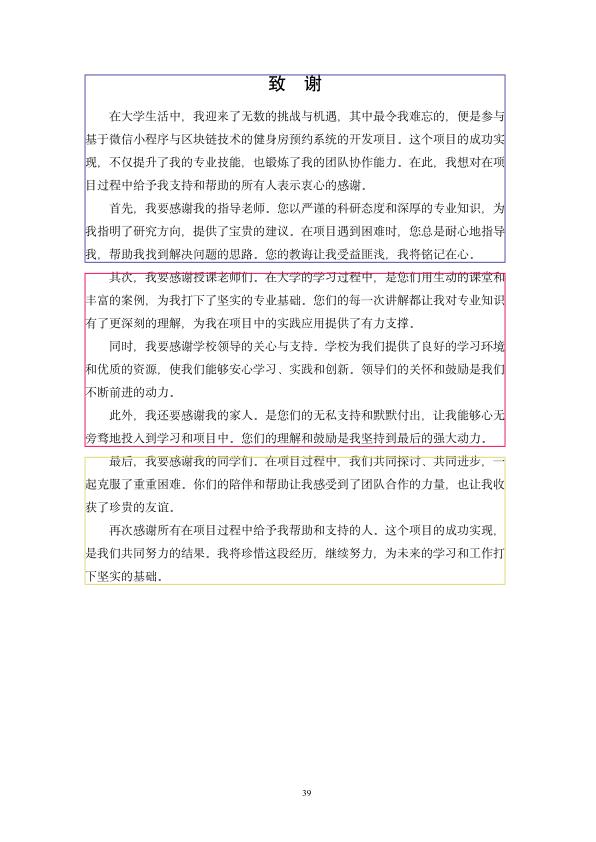

In [39]:
pdf = Pdf(pdf_path)
pdf.display_with_bboxes(
    parsed_pdf.nodes,
)